Input data

In [107]:
import numpy as np
#punti vettori per tabelle
Nunti = 14

Ls = 25e-6
Lm = 1.7e-3
Vbatt = 750
Vbus = 500
Po = 11e3
fsw = 125e3
n = 1


Read the Coss

75.9769435
83.26347754


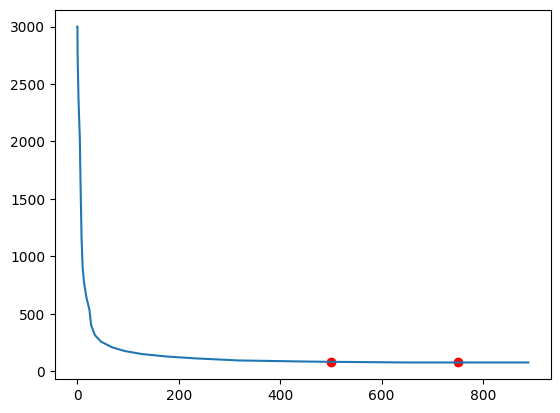

In [108]:
import numpy as np
import matplotlib.pyplot as plt

def leggi_file_txt(file_path):
    colonne = []
    with open(file_path, 'r') as file:
        righe = file.readlines()
        num_colonne = len(righe[0].split())
        
        for i in range(num_colonne):
            colonne.append([])  # Creazione di una lista vuota per ogni colonna
            
        for riga in righe:
            valori = riga.split()
            for i in range(num_colonne):
                colonne[i].append(float(valori[i]))  # Aggiunta dei valori alla colonna corrispondente
    
    return colonne

# Esempio di utilizzo
file_path = 'Coss_SCT040HU120G3AG.txt'  # Specifica il percorso del tuo file txt
vettori = np.array(leggi_file_txt(file_path))

# ricerca della posizione più vicina al valore di riferimento (24)
index_batt = np.argmin(np.abs(vettori[0] - Vbatt))
Coss_batt = vettori[1, index_batt]
# print("La posizione più vicina al valore di riferimento è:", index)
index_bus = np.argmin(np.abs(vettori[0] - Vbus))
Coss_bus = vettori[1, index_bus]

print(Coss_batt)
print(Coss_bus)
# Stampa i vettori risultanti
# for i, vettore in enumerate(vettori):
#     print(f"Vettore {i+1}: {vettore}")
plt.plot(vettori[0],vettori[1])
plt.scatter(Vbatt,Coss_batt, c="red")
plt.scatter(Vbus,Coss_bus, c="red")
plt.show()

In [116]:
import pandas as pd
import xlsxwriter as xl
import math

# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter("DAB_dt.xlsx", engine="xlsxwriter")
# Get the xlsxwriter workbook and worksheet objects.
workbook = writer.book
worksheet = workbook.add_worksheet('Base')
worksheet.hide_gridlines(2)
worksheet.set_column(0,22,None)


# define all formatas
param_format = workbook.add_format({'bold': True, 'italic': True,'bg_color': '#FEFBB8'})
um_format = workbook.add_format({'italic': True,'bg_color': '#FEFBB8'})
result_format=workbook.add_format({'bold': True, 'italic': True,'bg_color': '#C4D79B'})

df = pd.DataFrame(
    {
        "INPUT":["Ls","Lm","Vbatt","Vbus","Po","fsw","n"],
        "Value":[Ls,Lm,Vbatt,Vbus,Po,fsw,n],
        "":["H","H","V","V","W","Hz","-"],
    },
    )

# define the startig row and column
r=1
c=1
# Get the dimensions of the dataframe.
df.to_excel(writer, sheet_name="Base", startrow=r+1, startcol=c, header=False, index=False)
(max_row, max_col) = df.shape
# Create a list of column headers, to use in add_table().
column_settings = [{"header": column} for column in df.columns]
# Add the Excel table structure. Pandas will add the data.
worksheet.add_table(r, c, max_row+r, max_col+c - 1, {"columns": column_settings})

# define all quantities name, calculated
worksheet.write(max_row+r+2 ,c,"Po (W)",param_format)
worksheet.write(max_row+r+2 ,c+1,"Vbat (V)",param_format)
worksheet.write(max_row+r+2 ,c+2,"Vbus (V)",param_format)
worksheet.write(max_row+r+2 ,c+3,"Phi_calc (deg)",param_format)
worksheet.write(max_row+r+2 ,c+4,"ILP_fp (A)",param_format)
worksheet.write(max_row+r+2 ,c+5,"ILP_sp (A)",param_format)
worksheet.write(max_row+r+2 ,c+6,"ILS_fp (A)",param_format)
worksheet.write(max_row+r+2 ,c+7,"ILS_sp (A)",param_format)
worksheet.write(max_row+r+2 ,c+8,"fsw (Hz)",param_format)
worksheet.write(max_row+r+2 ,c+9,"P Batt (%)",param_format)
worksheet.write(max_row+r+2 ,c+10,"P Bus (%)",param_format)
worksheet.write(max_row+r+2 ,c+11,"\u03B7 calc (%)",param_format)
worksheet.write(max_row+r+2 ,c+12,"Coss_battP (pF)",param_format)
worksheet.write(max_row+r+2 ,c+13,"Coss_bus (pF)",param_format)
worksheet.write(max_row+r+2 ,c+14,"dt battery (s)",param_format)
worksheet.write(max_row+r+2 ,c+15,"dt bus (s)",param_format)
# define all quantities name, Measured
worksheet.write(max_row+r+2 ,c+16,"Ibatt (A)",result_format)
worksheet.write(max_row+r+2 ,c+17,"Ibus (A)",result_format)
worksheet.write(max_row+r+2 ,c+18,"\u03B7 mis (%)",result_format)
worksheet.write(max_row+r+2 ,c+19,"ILP_fp mis (A)",result_format)
worksheet.write(max_row+r+2 ,c+20,"ILP_sp mis (A)",result_format)
worksheet.write(max_row+r+2 ,c+21,"ILS_fp mis (A)",result_format)
worksheet.write(max_row+r+2 ,c+22,"ILS_sp mis (A)",result_format)

P = np.linspace(Po*0.01,Po,Nunti)

# Set the starting cell in Excel (B2)
start_row_P = max_row+r+3 
start_col_P = 1
# Write the vector to the Excel column
for i, value in enumerate(P):
    worksheet.write(start_row_P + i, start_col_P, value,um_format)
for i in range(len(P)):
    worksheet.write(start_row_P + i, start_col_P+1, Vbatt,um_format)

    worksheet.write(start_row_P + i, start_col_P+2, Vbus,um_format)

    Phi_cal = 'PI()/2*(1-SQRT(1-(8*$C$8*$C$3*abs(B{}))/($C$9*INDIRECT("C{}")*INDIRECT("D{}"))))*180/PI()'.format(start_row_P + i +1,start_row_P + i +1,start_row_P + i +1)
    worksheet.write_formula(start_row_P + i, start_col_P+3, Phi_cal,um_format)

    ILP_fp='=(C{}*PI()-D{}*(PI()-2*E{}*PI()/180))/(4*PI()*J{}*$C$3)'.format(start_row_P + i +1,start_row_P + i +1,start_row_P + i +1,start_row_P + i +1)
    worksheet.write_formula(start_row_P + i, start_col_P+4, ILP_fp,um_format)

    ILP_sp='=(C{}*(2*E{}*PI()/180-PI())+D{}*PI())/(4*PI()*J{}*$C$3)'.format(start_row_P + i +1,start_row_P + i +1,start_row_P + i +1,start_row_P + i +1)
    worksheet.write_formula(start_row_P + i, start_col_P+5, ILP_sp,um_format)

    ILS_fp='=$C$9*F{}'.format(start_row_P + i +1,start_row_P + i +1)
    worksheet.write_formula(start_row_P + i, start_col_P+6, ILS_fp,um_format)

    ILS_sp='=$C$9*G{}'.format(start_row_P + i +1,start_row_P + i +1)
    worksheet.write_formula(start_row_P + i, start_col_P+7, ILS_sp,um_format)

    worksheet.write(start_row_P + i, start_col_P+8, fsw,um_format)

    P_batt='=C{}*R{}'.format(start_row_P + i +1,start_row_P + i +1)
    worksheet.write_formula(start_row_P + i, start_col_P+9, P_batt,um_format)

    P_bus='=D{}*S{}'.format(start_row_P + i +1,start_row_P + i +1)
    worksheet.write_formula(start_row_P + i, start_col_P+10, P_bus,um_format)

    eta_calc='=K{}/L{}'.format(start_row_P + i +1,start_row_P + i +1)
    worksheet.write_formula(start_row_P + i, start_col_P+11, eta_calc,um_format)

    worksheet.write(start_row_P + i, start_col_P+12, Coss_batt,um_format)
    worksheet.write(start_row_P + i, start_col_P+13, Coss_bus,um_format)
    
    dt_batt = 'N{}*C{}/F{}*1E-12'.format(start_row_P + i +1,start_row_P + i +1,start_row_P + i +1,start_row_P + i +1)
    worksheet.write_formula(start_row_P + i, start_col_P+14, dt_batt,um_format)
    
    dt_bus = 'O{}*D{}/H{}*1E-12'.format(start_row_P + i +1,start_row_P + i +1,start_row_P + i +1,start_row_P + i +1)
    worksheet.write_formula(start_row_P + i, start_col_P+15, dt_bus,um_format)

workbook.close()
writer.close()